In [ ]:
# Project work done by:

# SAINATH VADDI     - 101179915
# SONY REDDY GURRAM - 101179182

In [53]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [54]:
# Fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

In [55]:
# Shapes of X and y
print(X.shape)
print(y.shape)

(5620, 64)
(5620, 1)


In [56]:
X = X.values
y = y.values

In [57]:
# Reshape data for CNN
X = X.reshape(-1, 8, 8, 1)

In [58]:
# Normalization data for CNN
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X.reshape(-1, 64))  # Reshape for MinMaxScaler
X_normalized = X_normalized.reshape(-1, 8, 8, 1)

In [59]:
# Define the CNN model
def create_model():
    model = models.Sequential([

        # Convolutional Layer 1
        layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (8, 8, 1)), # Parameters: 32 filters, kernel size (3, 3), Input Dimension: (8, 8, 1), Output Dimension: (8, 8, 32)

        # Add padding to increase spatial dimensions
        layers.ZeroPadding2D((1, 1)),

        # Max Pooling Layer 1
        layers.MaxPooling2D((2, 2)),  # Pool Size: (2, 2), Strides: (2, 2), Input Dimension: (8, 8, 32), Output Dimension: (4, 4, 32)

        # Convolutional Layer 2
        layers.Conv2D(64, (3, 3), activation='relu', padding = 'same',), # Parameters: 64 filters, kernel size (3, 3), Input Dimension: (4, 4, 32), Output Dimension: (4, 4, 64)

        # Max Pooling Layer 2
        layers.MaxPooling2D((2, 2)), # Pool Size: (2, 2), Strides: (2, 2), Input Dimension: (4, 4, 64), Output Dimension: (2, 2, 64)

        # Convolutional Layer 3
        layers.Conv2D(128, (3, 3), activation='relu', padding = 'same',), # Parameters: 128 filters, kernel size (3, 3), Input Dimension: (2, 2, 64), Output Dimension: (2, 2, 128)

        # Flattening Layer
        layers.Flatten(),  # Flattening the output of the last convolutional layer, Input Dimension: (2, 2, 128), Output Dimension: (512,)

        # Fully Connected Layer 1
        layers.Dense(64, activation='relu'),  # Fully Connected Layer with 64 neurons and ReLU activation, Input Dimension: (512,), Output Dimension: (64,)

        # Output Layer
        layers.Dense(10, activation='softmax')  # Output Layer with 10 neurons for classification and softmax activation, Input Dimension: (64,), Output Dimension: (10,)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [60]:
# Define k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
# Initialize lists to store results
fold_accuracy = []
fold_loss = []
all_y_true = []
all_y_pred = []

In [61]:
# Perform k-fold cross-validation
fold_accuracy = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X_normalized[train_index], X_normalized[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = create_model()
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
141/141 [==============================] - 6s 20ms/step - loss: 0.9238 - accuracy: 0.7242 - val_loss: 0.2480 - val_accuracy: 0.9279
Epoch 2/10
141/141 [==============================] - 3s 23ms/step - loss: 0.1493 - accuracy: 0.9562 - val_loss: 0.1360 - val_accuracy: 0.9573
Epoch 3/10
141/141 [==============================] - 3s 21ms/step - loss: 0.0892 - accuracy: 0.9724 - val_loss: 0.1857 - val_accuracy: 0.9493
Epoch 4/10
141/141 [==============================] - 4s 26ms/step - loss: 0.0676 - accuracy: 0.9802 - val_loss: 0.0721 - val_accuracy: 0.9813
Epoch 5/10
141/141 [==============================] - 3s 21ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0.0775 - val_accuracy: 0.9786
Epoch 6/10
141/141 [==============================] - 3s 21ms/step - loss: 0.0373 - accuracy: 0.9898 - val_loss: 0.0765 - val_accuracy: 0.9778
Epoch 7/10
141/141 [==============================] - 3s 22ms/step - loss: 0.0386 - accuracy: 0.9891 - val_loss: 0.0608 - val_accuracy: 0.9804

In [62]:
# Record accuracy and loss
fold_accuracy.append(history.history['val_accuracy'])
fold_loss.append(history.history['val_loss'])

In [63]:
# Predictions
y_pred = np.argmax(model.predict(X_val), axis=1)
all_y_true.extend(y_val)
all_y_pred.extend(y_pred)

36/36 [==============================] - 0s 4ms/step


In [64]:
# Calculate and print average validation accuracy across folds
avg_val_accuracy = np.mean(fold_accuracy, axis=0)
print('Average validation accuracy across folds:', avg_val_accuracy)

Average validation accuracy across folds: [0.95017791 0.97508895 0.98042703 0.97597867 0.98131675 0.97686833
 0.98042703 0.96975088 0.97775799 0.9822064 ]


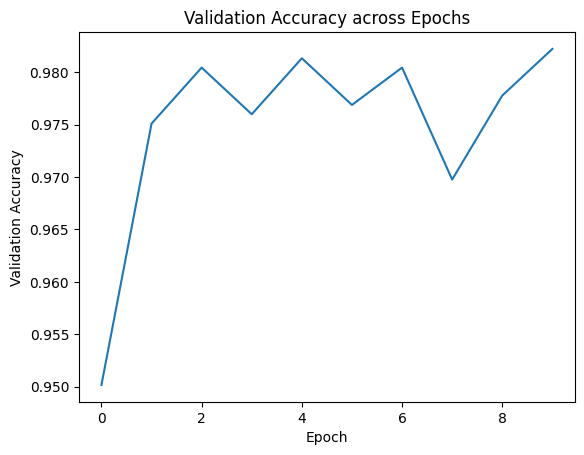

In [65]:
# Plot the validation accuracy across epochs
plt.plot(avg_val_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy across Epochs')
plt.show()

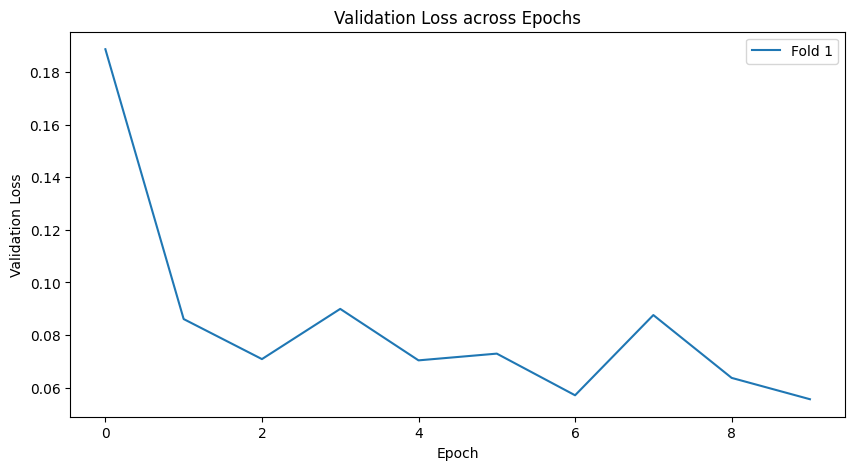

In [66]:
# Plot the validation loss across epochs
plt.figure(figsize=(10, 5))
for i in range(len(fold_loss)):
    plt.plot(history.epoch, fold_loss[i], label=f'Fold {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss across Epochs')
plt.legend()
plt.show()

In [67]:
# Calculate overall accuracy
overall_accuracy = accuracy_score(all_y_true, all_y_pred)
print('Overall accuracy:', overall_accuracy)

Overall accuracy: 0.9822064056939501


In [68]:
classification_report = classification_report(y_val, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       0.89      0.99      0.94       104
           2       1.00      0.98      0.99       114
           3       1.00      1.00      1.00       113
           4       0.98      1.00      0.99       112
           5       0.99      0.98      0.99       111
           6       1.00      1.00      1.00       110
           7       0.98      1.00      0.99       114
           8       1.00      0.90      0.95       125
           9       0.98      0.97      0.98       114

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



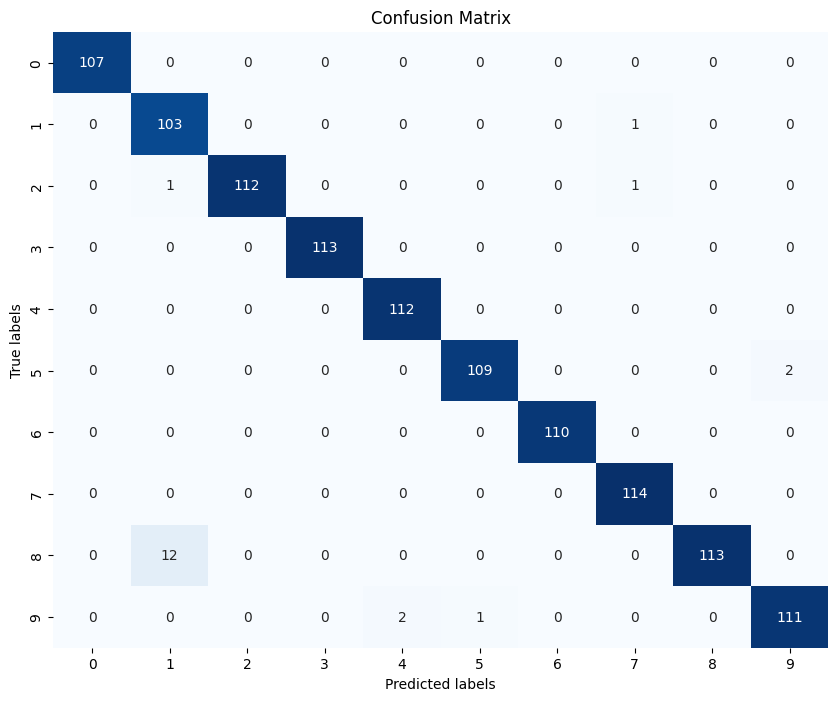

In [69]:
# Confusion matrix
conf_matrix = confusion_matrix(all_y_true, all_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()